## 线性规划scipy.optimize.linprog

In [10]:
from scipy.optimize import linprog

#### 一般形式
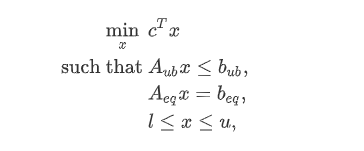
官方文档：https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

#### 例一：
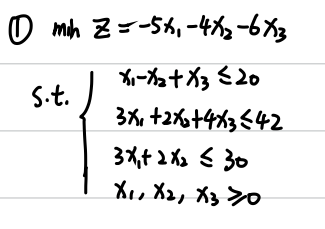

In [11]:
c = [-5, -4, -6]  # 目标函数系数
A = [[1, -1, 1],  # 不等式约束系数
     [3, 2, 4],
     [3, 2, 0]]
b = [20, 42, 30]  # 不等式约束值
# 上下界默认为[0, +inf]
res = linprog(c, A_ub=A, b_ub=b, method='revised simplex')

In [12]:
import numpy as np
np.set_printoptions(suppress=True)  # 不使用用科学计数法

In [13]:
res

     con: array([], dtype=float64)
     fun: -78.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([32.,  0.,  0.])
  status: 0
 success: True
       x: array([ 0., 15.,  3.])

#### 例二：
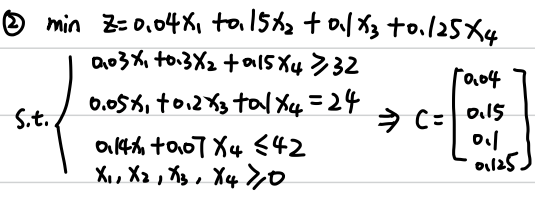

In [14]:
c = [0.04, 0.15, 0.1, 0.125]
A = [[-0.03, -0.3, 0, -0.15],
     [0.14, 0, 0, 0.07]]
A_eq = [[0.05, 0, 0.2, 0.1]]  # 等式约束系数矩阵，只有一行的情况下必须写两个[]
b = [-32, 42]  # 不等式约束值
b_eq = 24  # 等式约束值
res = linprog(c, A_ub=A, A_eq=A_eq, b_ub=b, b_eq=b_eq, method='revised simplex')

In [15]:
res

     con: array([0.])
     fun: 28.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([ 0., 42.])
  status: 0
 success: True
       x: array([  0.        , 106.66666667, 120.        ,   0.        ])

#### 无解情况，观察message中的信息

In [16]:
c = [1, 1]
A = [[1, 2]]
b = 8
A_eq = [[1, 1]]
b_eq = 10
res = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq)
res

     con: array([8.98932503])
     fun: 1.0106749652571962
 message: 'The algorithm terminated successfully and determined that the problem is infeasible.'
     nit: 4
   slack: array([6.1035428])
  status: 2
 success: False
       x: array([0.12489273, 0.88578224])

## 整数线性规划pulp

In [17]:
from pulp import *

#### 例一
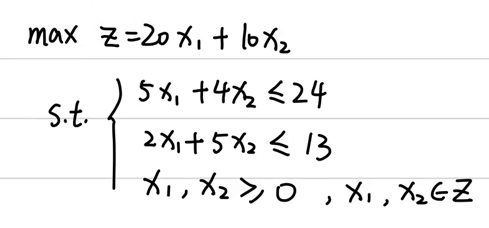

In [18]:
# 创建LpProblem对象，并指定类型：LpMaximize
my_MipProblem = LpProblem('test1', LpMaximize)

In [19]:
# 指明参数范围、类型，LpInterger代表整型
x1 = LpVariable('x1', lowBound=0, cat=LpInteger)
x2 = LpVariable('x2', lowBound=0, cat=LpInteger)

In [20]:
# 添加目标函数以及约束
my_MipProblem += 20 * x1 + 10 * x2, 'obj'
my_MipProblem += 5 * x1 + 4 * x2 <= 24, 'c1'
my_MipProblem += 2 * x1 + 5 * x2 <= 13, 'c2'

In [21]:
# 返回状态，1代表成功
my_MipProblem.solve()

1

In [22]:
my_MipProblem.status

1

In [23]:
my_MipProblem.variables

<bound method LpProblem.variables of test1:
MAXIMIZE
20*x1 + 10*x2 + 0
SUBJECT TO
c1: 5 x1 + 4 x2 <= 24

c2: 2 x1 + 5 x2 <= 13

VARIABLES
0 <= x1 Integer
0 <= x2 Integer
>

In [24]:
# 打印求解得到的参数值
for v in my_MipProblem.variables():
    print(v.varValue)

4.0
1.0


In [25]:
my_MipProblem.objective

20*x1 + 10*x2 + 0

In [26]:
# 打印求解得到的目标函数值
value(my_MipProblem.objective)

90.0

#### 例二
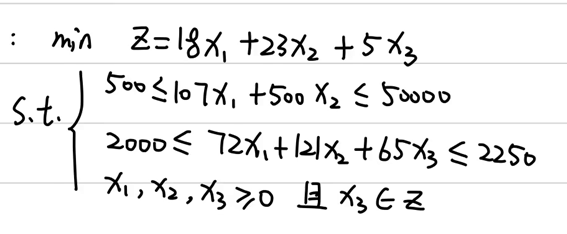

In [27]:
m1 = LpProblem('test2', LpMinimize)

x1 = LpVariable('x1', lowBound=0)
x2 = LpVariable('x2', lowBound=0)
x3 = LpVariable('x3', lowBound=0, cat=LpInteger)

m1 += 18*x1 + 23*x2 + 5*x3, 'obj'
m1 += 72*x1 +121*x2 + 65*x3 <= 2250, 'c1'
m1 += 72*x1 +121*x2 + 65*x3 >= 2000, 'c2'
m1 += 107*x1 + 500*x2 <= 50000, 'c3'
m1 += 107*x1 + 500*x2 >= 500, 'c4'

m1.solve()

1

In [28]:
m1.variables

<bound method LpProblem.variables of test2:
MINIMIZE
18*x1 + 23*x2 + 5*x3 + 0
SUBJECT TO
c1: 72 x1 + 121 x2 + 65 x3 <= 2250

c2: 72 x1 + 121 x2 + 65 x3 >= 2000

c3: 107 x1 + 500 x2 <= 50000

c4: 107 x1 + 500 x2 >= 500

VARIABLES
x1 Continuous
x2 Continuous
0 <= x3 Integer
>

In [29]:
value(m1.objective)

168.0

In [30]:
for v in m1.variables():
    print(v.name,'=',v.varValue)

x1 = 0.0
x2 = 1.0
x3 = 29.0


#### 例三
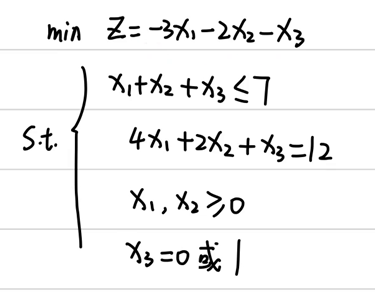

In [31]:
m2 = LpProblem('test3', LpMinimize)

x1 = LpVariable('x1', lowBound=0)
x2 = LpVariable('x2', lowBound=0)
x3 = LpVariable('x3', cat=LpBinary)  # 0-1变量

m2 += -3*x1 - 2*x2 - x3, 'obj'
m2 += x1 + x2 + x3 <= 7, 'c1'
m2 += 4*x1 + 2*x2 + x3 == 12, 'c2'

m2.solve()

1

In [32]:
for v in m2.variables():
    print(v.name,'=',v.varValue)

x1 = 0.0
x2 = 6.0
x3 = 0.0


In [33]:
value(m2.objective)

-12.0

## 应用

### 0-1背包问题

In [34]:
from pulp import *

In [35]:
my_package = pulp.LpProblem('package', LpMaximize)
x1 = LpVariable('x1', cat=LpBinary)
x2 = LpVariable('x2', cat=LpBinary)
x3 = LpVariable('x3', cat=LpBinary)
x4 = LpVariable('x4', cat=LpBinary)
x5 = LpVariable('x5', cat=LpBinary)
x6 = LpVariable('x6', cat=LpBinary)
x7 = LpVariable('x7', cat=LpBinary)
x8 = LpVariable('x8', cat=LpBinary)
x9 = LpVariable('x9', cat=LpBinary)
x10 = LpVariable('x10', cat=LpBinary)

In [36]:
my_package += 540*x1+200*x2+180*x3+350*x4+60*x5+150*x6+280*x7+450*x8+320*x9+120*x10, 'obj'
my_package += 6*x1+3*x2+4*x3+5*x4+x5+2*x6+3*x7+5*x8+4*x9+2*x10<=30, 'c1'

In [37]:
my_package.solve()

1

In [38]:
value(my_package.objective)

2410.0

In [39]:
for v in my_package.variables():
    print(v.name,'=',v.varValue)

x1 = 1.0
x10 = 1.0
x2 = 1.0
x3 = 0.0
x4 = 1.0
x5 = 0.0
x6 = 1.0
x7 = 1.0
x8 = 1.0
x9 = 1.0


### 指派问题scipy.optimize.linear_sum_assignment
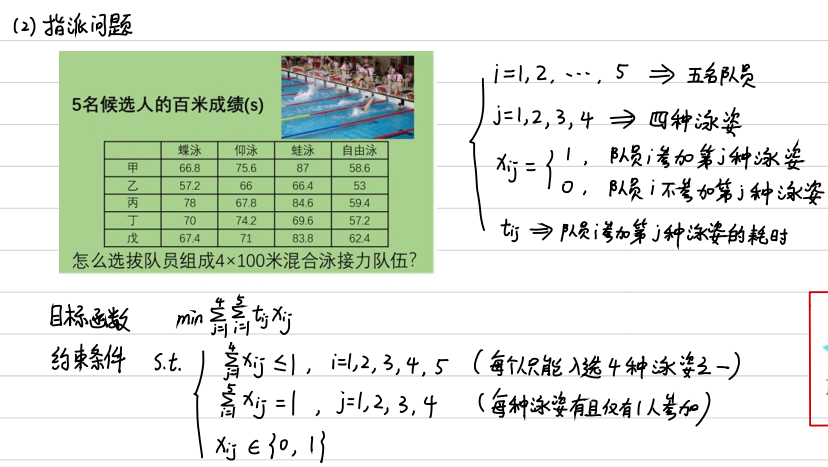

In [1]:
import numpy as np
from scipy.optimize import linear_sum_assignment

In [41]:
# 损耗矩阵
cost = np.array([[66.8, 75.6, 87, 58.6],
                 [57.2, 66, 66.4, 53],
                 [78, 67.8, 84.6, 59.4],
                 [70, 74.2, 69.6, 57.2],
                 [67.4, 71, 83.8, 62.4]])
row_ind, col_ind = linear_sum_assignment(cost)

In [42]:
row_ind

array([0, 1, 2, 3], dtype=int64)

In [43]:
col_ind

array([3, 0, 1, 2])

In [44]:
# 目标成员坐标
list(zip(row_ind,col_ind))

[(0, 3), (1, 0), (2, 1), (3, 2)]

In [45]:
# 目标函数值
cost[row_ind, col_ind].sum()

253.20000000000002

### 钢管切割问题
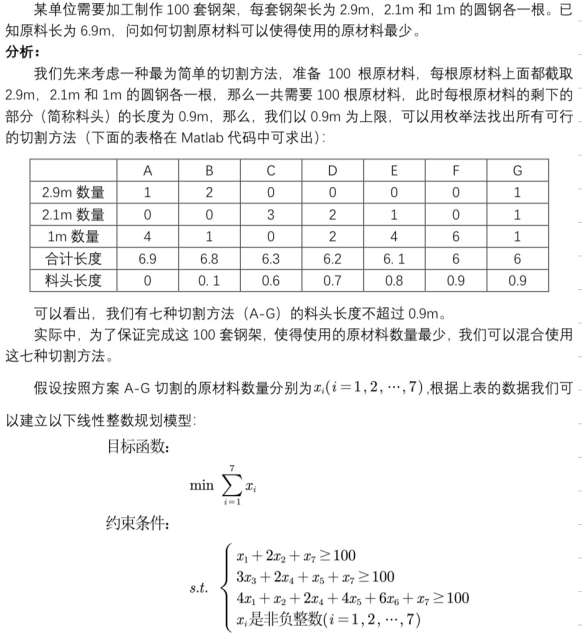

In [46]:
my_tube = pulp.LpProblem('tube', LpMinimize)

x1 = LpVariable('x1', lowBound=0, cat=LpInteger)
x2 = LpVariable('x2', lowBound=0, cat=LpInteger)
x3 = LpVariable('x3', lowBound=0, cat=LpInteger)
x4 = LpVariable('x4', lowBound=0, cat=LpInteger)
x5 = LpVariable('x5', lowBound=0, cat=LpInteger)
x6 = LpVariable('x6', lowBound=0, cat=LpInteger)
x7 = LpVariable('x7', lowBound=0, cat=LpInteger)

my_tube += x1+x2+x3+x4+x5+x6+x7, 'obj'
my_tube += x1 + 2*x2 + x7 >=100, 'c1'
my_tube += 3*x3+2*x4+x5+x7 >=100, 'c2'
my_tube += 4*x1+x2+2*x4+4*x5+6*x6+x7 >=100

my_tube.solve()

1

In [47]:
value(my_tube.objective)

91.0

In [48]:
for v in my_tube.variables():
    print(v.name,'=',v.varValue)

x1 = 8.0
x2 = 46.0
x3 = 26.0
x4 = 11.0
x5 = 0.0
x6 = 0.0
x7 = 0.0
